A car traveling along a straight road is clocked at a number of points. The data from the observations are given in the following table, where the time is in seconds, the distance is in feet, and the speed is in feet per second.

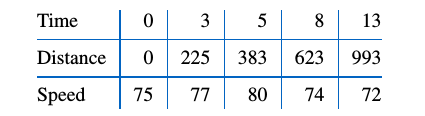

 Use a Hermite polynomial to predict the position of the car and its speed when t = 10 s.
 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x=[0,3,5,8,13]
fx=[0,225,383,623,993]
dfdx=[75,77,80,74,72]

In [20]:
n=len(x)
z=np.zeros(2*n)
Q=np.zeros((2*n,2*n))

for i in range(0,n):
    z[2*i]=x[i]
    z[2*i+1]=x[i]
    Q[2*i][0]=fx[i]
    Q[2*i+1][0]=fx[i]
    Q[2*i+1][1]=dfdx[i]

    
    if(i!=0):
        Q[2*i][1]=(Q[2*i+1][0]-Q[2*i-1][0])/(z[2*i]-z[2*i-1])

for i in range(2,2*n):
    for j in range(2,i+1):
        Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(z[i]-z[i-j])

        
def H(x):
    sum=0.
    for k in range(1,len(z)):
        prod=1.
        for j in range(0,k):
            prod*=(x-z[j])
        sum+=Q[k][k]*prod
    H=Q[0][0]+sum
    return H

print ("El valor de la posición cuando t=10s es %.5e" %(H(10)))
##print(Q)

El valor de la posición cuando t=10s es 7.42503e+02


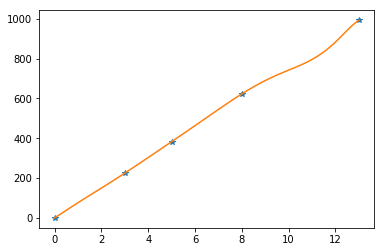

In [10]:
x_array=np.linspace(min(x),max(x),100)
y_array=[]

for i in range(0,len(x_array)):
    y_array.append(H(x_array[i]))

        
fig=plt.figure()
ax=plt.axes()
ax.plot(x,fx,'*')
ax.plot(x_array,y_array,'-')
plt.show()